In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1', parse_dates=True) 

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

m_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date','imdb_url', 'unknown', 'Action' , 'Adventure' , 'Animation', "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy', "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" ,"Thriller" , "War" , "Western" ]
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(24), encoding='latin-1')

movie_ratings = pd.merge(movies, ratings)
df = pd.merge(movie_ratings, users)

df.head(20)

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,308,5,887736696,60,M,retired,95076
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,308,4,887737194,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),0,0,0,0,0,...,1,0,0,308,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,0,...,1,0,0,308,5,887737243,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,0,0,0,0,0,...,0,0,0,308,3,887739426,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,0,1,0,0,0,...,1,0,0,308,4,887739056,60,M,retired,95076


In [3]:
raw_data = df.copy(True)

In [4]:
df['user_id'].unique()

array([308, 287, 148, 280,  66,   5, 109, 181,  95, 268, 189, 145, 158,
        67, 232, 150, 289, 117,  49, 223,  56,  17, 340, 177, 194, 250,
       213, 350, 348, 131, 106, 234,  43,  20, 246,  94, 279,  38, 128,
        96, 203, 157, 311, 125, 286,  83, 301, 345,  18, 322,  64,  45,
       247, 204, 271,  41, 274, 222,  15,  23, 141, 359, 374, 380,  10,
       320, 160, 396, 339, 199, 422,  81,  42, 357,  26, 327, 200,  44,
       256, 174,  97, 243, 101, 490, 242, 312, 325, 456, 347, 360, 450,
        84, 198, 494, 525,   2,  62, 343, 298, 459, 407, 471, 535, 500,
       512, 275, 252, 230, 249,  93, 514, 193, 484,  54,  75, 338,  13,
       472, 541, 209, 144, 417, 454, 313, 202, 579, 447, 137, 508,   1,
       569, 416, 291, 401, 479, 567, 561, 390, 162, 332, 363, 455, 394,
       120, 297, 540, 231, 560, 379,  59,  99, 254, 533, 441, 292, 262,
       483,  16, 592, 526, 307, 344, 649, 299, 324, 545, 517,  82, 658,
       460, 622, 429,  73, 326, 330, 532, 470, 620, 263, 184, 57

In [5]:
age = df['age'].value_counts()

In [6]:
pd.DataFrame(age)

,age
27,6423
24,4556
20,4089
25,4013
22,3979
...,...
62,46
7,43
66,37
10,31


In [7]:
df.describe()

,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,unix_timestamp,age
count,100000.000000,0.0,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,100000.000000
mean,425.530130,NaN,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,0.080550,0.007580,...,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540,462.48475,3.529860,8.835289e+08,32.969850
std,330.798356,NaN,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,0.272144,0.086733,...,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894,266.61442,1.125674,5.343856e+06,11.562623
min,1.000000,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.00000,1.000000,8.747247e+08,7.000000
25%,175.000000,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,254.00000,3.000000,8.794487e+08,24.000000
50%,322.000000,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,447.00000,4.000000,8.828269e+08,30.000000
75%,631.000000,NaN,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,682.00000,4.000000,8.882600e+08,40.000000
max,1682.000000,NaN,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,943.00000,5.000000,8.932866e+08,73.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            100000 non-null  int64  
 1   movie_title         100000 non-null  object 
 2   release_date        99991 non-null   object 
 3   video_release_date  0 non-null       float64
 4   imdb_url            99987 non-null   object 
 5   unknown             100000 non-null  int64  
 6   Action              100000 non-null  int64  
 7   Adventure           100000 non-null  int64  
 8   Animation           100000 non-null  int64  
 9   Children's          100000 non-null  int64  
 10  Comedy              100000 non-null  int64  
 11  Crime               100000 non-null  int64  
 12  Documentary         100000 non-null  int64  
 13  Drama               100000 non-null  int64  
 14  Fantasy             100000 non-null  int64  
 15  Film-Noir           100000 non-null

In [9]:
df[df['release_date'].isnull() == False]

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,308,5,887736696,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,0,1,0,0,0,...,1,0,0,729,4,893286638,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,1,0,0,0,...,1,0,0,729,3,893286338,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Peacemaker%2C...,0,1,0,0,0,...,1,1,0,729,3,893286299,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,1,...,0,0,0,729,1,893286511,19,M,student,56567


In [10]:
df.drop("video_release_date", axis = 1, inplace = True)

In [11]:
df.head()

,movie_id,movie_title,release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,308,5,887736696,60,M,retired,95076


In [12]:
df.drop("imdb_url", axis = 1, inplace = True)

In [13]:
df

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,308,5,887736696,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,0,1,0,0,0,0,0,...,1,0,0,729,4,893286638,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,0,1,0,0,0,0,0,...,1,0,0,729,3,893286338,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,0,1,0,0,0,0,0,...,1,1,0,729,3,893286299,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,0,0,0,0,1,1,0,...,0,0,0,729,1,893286511,19,M,student,56567


In [58]:
df.drop('movie_title', axis = 1, inplace = True)

In [14]:
df['release_date'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: release_date, Length: 100000, dtype: bool

In [15]:
df[df['release_date'].isnull() == True]

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
899,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,5,4,875635064,33,F,other,15213
2092,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,268,3,875742077,24,M,engineer,19422
11419,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,422,4,875655986,26,M,entertainment,94533
20369,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,1,4,875692955,24,M,technician,85711
23138,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,297,3,875409139,29,F,educator,98103
27774,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,532,3,875441348,20,M,student,92705
41706,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,130,5,875801239,20,M,none,60115
78071,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,833,1,875655669,34,M,writer,90019
99692,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,319,4,875707690,38,M,programmer,22030


In [16]:
df.drop(index = df[df['release_date'].isnull() == True].index, inplace = True)

In [17]:
df.isnull().any()

movie_id          False
movie_title       False
release_date      False
unknown           False
Action            False
Adventure         False
Animation         False
Children's        False
Comedy            False
Crime             False
Documentary       False
Drama             False
Fantasy           False
Film-Noir         False
Horror            False
Musical           False
Mystery           False
Romance           False
Sci-Fi            False
Thriller          False
War               False
Western           False
user_id           False
rating            False
unix_timestamp    False
age               False
sex               False
occupation        False
zip_code          False
dtype: bool

In [18]:
df[df['release_date'].isnull() == True].index

Int64Index([], dtype='int64')

In [19]:
df.head()

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,308,5,887736696,60,M,retired,95076


In [20]:
df['occupation'].unique()

array(['retired', 'salesman', 'engineer', 'librarian', 'student', 'other',
       'executive', 'administrator', 'artist', 'entertainment',
       'educator', 'scientist', 'none', 'programmer', 'homemaker',
       'marketing', 'technician', 'lawyer', 'writer', 'healthcare',
       'doctor'], dtype=object)

In [21]:
df_ohe = pd.get_dummies(df.sex, prefix='sex')

In [22]:
df_ohe

,sex_F,sex_M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
99995,0,1
99996,0,1
99997,0,1
99998,0,1


In [23]:
# df.drop('sex', inplace = True, axis = 1)

In [24]:
df.head()

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,308,5,887736696,60,M,retired,95076


In [25]:
df['user_id'].nunique()

943

In [26]:
df['movie_id'].nunique()

1681

<AxesSubplot:>

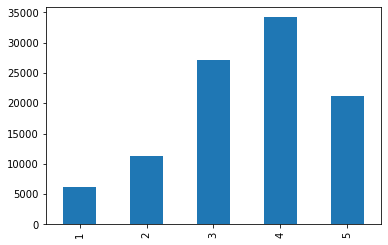

In [27]:
df['rating'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

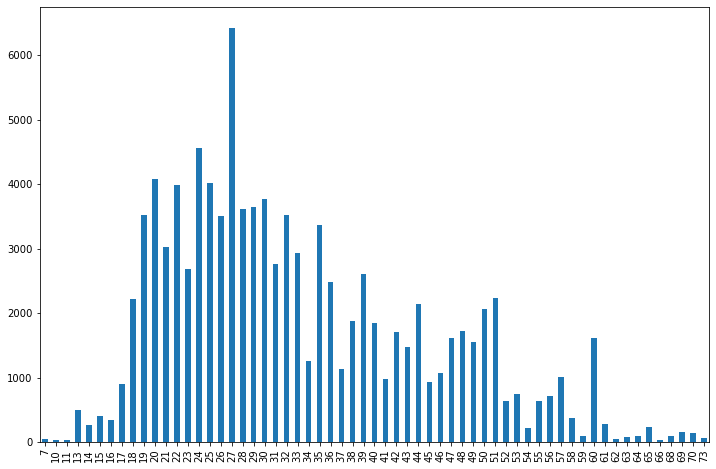

In [28]:
df['age'].value_counts().sort_index().plot.bar(figsize=(12,8))

In [29]:
data = pd.read_csv('ml-100k/u.data', sep="\t", header=None)
data.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [30]:
data_t = data.sort_values(['user_id', 'timestamp']).reset_index(drop=True)
data_t['one'] = 1
data_t['cumsum'] = data_t.groupby('user_id')['one'].cumsum()
data_t['mean_rate'] = data_t.groupby('user_id')['rating'].cumsum() / data_t['cumsum']
data_t.head()

,user_id,movie_id,rating,timestamp,one,cumsum,mean_rate
0,1,168,5,874965478,1,1,5.00
1,1,172,5,874965478,1,2,5.00
2,1,165,5,874965518,1,3,5.00
3,1,156,4,874965556,1,4,4.75
4,1,196,5,874965677,1,5,4.80


In [31]:
df

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,308,5,887736696,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,0,1,0,0,0,0,0,...,1,0,0,729,4,893286638,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,0,1,0,0,0,0,0,...,1,0,0,729,3,893286338,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,0,1,0,0,0,0,0,...,1,1,0,729,3,893286299,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,0,0,0,0,1,1,0,...,0,0,0,729,1,893286511,19,M,student,56567


In [32]:
df = df.merge(data_t, how='left', left_on=['user_id', 'movie_id', 'unix_timestamp', 'rating'], right_on=['user_id', 'movie_id', 'timestamp', 'rating'])

In [33]:
df.columns

Index(['movie_id', 'movie_title', 'release_date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'user_id',
       'rating', 'unix_timestamp', 'age', 'sex', 'occupation', 'zip_code',
       'timestamp', 'one', 'cumsum', 'mean_rate'],
      dtype='object')

In [34]:
df

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,rating,unix_timestamp,age,sex,occupation,zip_code,timestamp,one,cumsum,mean_rate
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,4,887736532,60,M,retired,95076,887736532,1,14,3.071429
1,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,5,887737890,60,M,retired,95076,887737890,1,149,3.838926
2,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,4,887739608,60,M,retired,95076,887739608,1,301,3.843854
3,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,4,887738847,60,M,retired,95076,887738847,1,240,3.850000
4,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,5,887736696,60,M,retired,95076,887736696,1,36,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,748,"Saint, The (1997)",14-Mar-1997,0,1,0,0,0,0,0,...,4,893286638,19,M,student,56567,893286638,1,18,2.722222
99987,751,Tomorrow Never Dies (1997),01-Jan-1997,0,1,0,0,0,0,0,...,3,893286338,19,M,student,56567,893286338,1,7,2.285714
99988,879,"Peacemaker, The (1997)",01-Jan-1997,0,1,0,0,0,0,0,...,3,893286299,19,M,student,56567,893286299,1,5,2.200000
99989,894,Home Alone 3 (1997),01-Jan-1997,0,0,0,0,1,1,0,...,1,893286511,19,M,student,56567,893286511,1,11,1.909091


In [35]:
df.drop(['one', 'timestamp', 'cumsum'], axis = 1, inplace = True)

In [36]:
df.columns

Index(['movie_id', 'movie_title', 'release_date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'user_id',
       'rating', 'unix_timestamp', 'age', 'sex', 'occupation', 'zip_code',
       'mean_rate'],
      dtype='object')

In [37]:
# df['sex'] = (df['sex'] == 'M').astype(int)

In [41]:
(df['sex'] == 'M').value_counts()

True     74253
False    25738
Name: sex, dtype: int64

In [45]:
df['sex'] = (df['sex'] == 'M').astype(int)

In [46]:
df

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,mean_rate
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,308,4,887736532,60,1,retired,95076,3.071429
1,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,308,5,887737890,60,1,retired,95076,3.838926
2,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,308,4,887739608,60,1,retired,95076,3.843854
3,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,308,4,887738847,60,1,retired,95076,3.850000
4,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,0,0,308,5,887736696,60,1,retired,95076,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,748,"Saint, The (1997)",14-Mar-1997,0,1,0,0,0,0,0,...,0,0,729,4,893286638,19,1,student,56567,2.722222
99987,751,Tomorrow Never Dies (1997),01-Jan-1997,0,1,0,0,0,0,0,...,0,0,729,3,893286338,19,1,student,56567,2.285714
99988,879,"Peacemaker, The (1997)",01-Jan-1997,0,1,0,0,0,0,0,...,1,0,729,3,893286299,19,1,student,56567,2.200000
99989,894,Home Alone 3 (1997),01-Jan-1997,0,0,0,0,1,1,0,...,0,0,729,1,893286511,19,1,student,56567,1.909091


In [48]:
occupation_df = pd.get_dummies(df['occupation'])

In [55]:
len(occupation_df.columns)

21

In [50]:
df['occupation'].unique()

array(['retired', 'salesman', 'engineer', 'librarian', 'student', 'other',
       'executive', 'administrator', 'artist', 'entertainment',
       'educator', 'scientist', 'none', 'programmer', 'homemaker',
       'marketing', 'technician', 'lawyer', 'writer', 'healthcare',
       'doctor'], dtype=object)

In [52]:
df = pd.concat([df, occupation_df], axis = 1)

In [59]:
df

,movie_id,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,1,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,7,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8,01-Jan-1995,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,748,14-Mar-1997,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99987,751,01-Jan-1997,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99988,879,01-Jan-1997,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99989,894,01-Jan-1997,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
df.columns

Index(['movie_id', 'release_date', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'user_id', 'rating',
       'unix_timestamp', 'age', 'sex', 'occupation', 'zip_code', 'mean_rate',
       'administrator', 'artist', 'doctor', 'educator', 'engineer',
       'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
       'librarian', 'marketing', 'none', 'other', 'programmer', 'retired',
       'salesman', 'scientist', 'student', 'technician', 'writer'],
      dtype='object')

In [62]:
df['user_id'].describe()

count    99991.000000
mean       462.498305
std        266.612120
min          1.000000
25%        254.000000
50%        447.000000
75%        682.000000
max        943.000000
Name: user_id, dtype: float64

<AxesSubplot:>

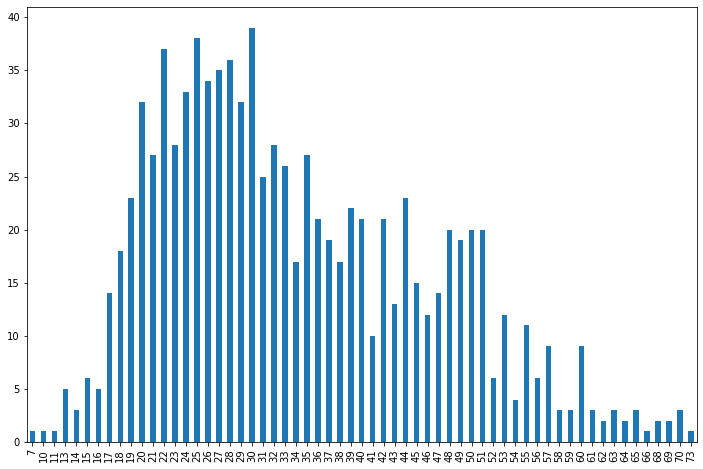

In [64]:
users['age'].value_counts().sort_index().plot.bar(figsize=(12, 8))

In [66]:
df['zip_code'].unique()

array(['95076', '31211', '97006', '22903', '80521', '15213', '55423',
       '21218', '10707', '19422', '95014', 'V3N4P', '27606', '60402',
       '99709', '02139', '94619', '16125', '76111', '47906', '46260',
       '06355', '80123', '19104', '02154', '95110', '55345', '97301',
       '45660', '15237', '55125', '94702', '20854', '95660', '28734',
       '71457', '85251', '54467', '20009', '75206', '32301', '70808',
       '73071', '22202', '15217', '44133', '55439', '94143', '37212',
       '50613', '43202', '50233', '20770', '10960', '22932', '80525',
       '55414', '27502', '48197', '36117', '61801', '78746', '55117',
       '90703', '24060', '66215', '94551', '37901', '17604', '94533',
       '17870', '98133', '21044', '11101', '93402', '39042', '52302',
       '98006', '60201', '05146', 'V5A2B', '31404', '02110', '31820',
       '90210', '98027', '11758', '55369', '49428', '19711', '94043',
       '97214', '30093', '01581', '29201', '03261', '77459', '80302',
       '94305', '200

In [140]:
date_t = df[(df['movie_id'] ==22) & (df['user_id'] == 308)]['release_date'].values

In [141]:
df['release_date'].values[0]

'01-Jan-1995'

In [145]:
date_t[0]

'16-Feb-1996'

In [158]:
import calendar
import datetime

date = datetime.datetime(1996, 2, 16, 0, 0)
utc_time = calendar.timegm(date.utctimetuple())
print(utc_time)

824428800


In [159]:
df['release_date'].values

array(['01-Jan-1995', '01-Jan-1995', '01-Jan-1995', ..., '01-Jan-1997',
       '01-Jan-1997', '25-Dec-1997'], dtype=object)

In [161]:
df['release_date'].values[0][0:2]

'01'

'Jan'

1


In [164]:
df['release_date'].values[0][7:11]

'1995'

In [290]:
import calendar
import datetime

In [280]:
def date_to_unix(data):
    arr = list()
    for i,l in enumerate(data):
        if ord(l) == 45:
            arr.append(i)
    date = int(data[0:arr[0]])
    month_name = data[arr[0]+1:arr[1]]
    datetime_object = datetime.datetime.strptime(month_name, "%b")
    month = datetime_object.month
    year = int(data[arr[1]+1:arr[1]+5])
    date = datetime.datetime(year, month, date, 0, 0)
    utc_time = calendar.timegm(date.utctimetuple())
    return(utc_time)

In [273]:
date = datetime.datetime(1995, 1, 1, 0, 0)
utc_time = calendar.timegm(date.utctimetuple())
print(utc_time)

788918400


In [274]:
df['release_date'][0]

'01-Jan-1995'

In [278]:
date_to_unix(df['release_date'][0])

1 1 1995


788918400

In [184]:
df['release_date'][0]

'01-Jan-1995'

In [283]:
df['release_date'] = df['release_date'].apply(date_to_unix)

In [262]:
t = '1-Jan-1995'

In [263]:
arr = list()
for i,l in enumerate(t):
    if ord(l) == 45:
        arr.append(i)

In [264]:
arr

[1, 5]

0        01-Jan-1995
1        01-Jan-1995
2        01-Jan-1995
3        01-Jan-1995
4        01-Jan-1995
            ...     
99986    14-Mar-1997
99987    01-Jan-1997
99988    01-Jan-1997
99989    01-Jan-1997
99990    25-Dec-1997
Name: release_date, Length: 99991, dtype: object

In [291]:
df['release_date'].describe()

count    9.999100e+04
mean     5.713658e+08
std      4.495283e+08
min     -1.514765e+09
25%      5.049216e+08
50%      7.573824e+08
75%      8.438688e+08
max      9.091008e+08
Name: release_date, dtype: float64

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99990
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        99991 non-null  int64  
 1   release_date    99991 non-null  int64  
 2   unknown         99991 non-null  int64  
 3   Action          99991 non-null  int64  
 4   Adventure       99991 non-null  int64  
 5   Animation       99991 non-null  int64  
 6   Children's      99991 non-null  int64  
 7   Comedy          99991 non-null  int64  
 8   Crime           99991 non-null  int64  
 9   Documentary     99991 non-null  int64  
 10  Drama           99991 non-null  int64  
 11  Fantasy         99991 non-null  int64  
 12  Film-Noir       99991 non-null  int64  
 13  Horror          99991 non-null  int64  
 14  Musical         99991 non-null  int64  
 15  Mystery         99991 non-null  int64  
 16  Romance         99991 non-null  int64  
 17  Sci-Fi          99991 non-null 

In [287]:
df.drop('occupation', axis = 1, inplace = True)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99990
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        99991 non-null  int64  
 1   release_date    99991 non-null  int64  
 2   unknown         99991 non-null  int64  
 3   Action          99991 non-null  int64  
 4   Adventure       99991 non-null  int64  
 5   Animation       99991 non-null  int64  
 6   Children's      99991 non-null  int64  
 7   Comedy          99991 non-null  int64  
 8   Crime           99991 non-null  int64  
 9   Documentary     99991 non-null  int64  
 10  Drama           99991 non-null  int64  
 11  Fantasy         99991 non-null  int64  
 12  Film-Noir       99991 non-null  int64  
 13  Horror          99991 non-null  int64  
 14  Musical         99991 non-null  int64  
 15  Mystery         99991 non-null  int64  
 16  Romance         99991 non-null  int64  
 17  Sci-Fi          99991 non-null 